<a href="https://colab.research.google.com/github/datawilly/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic/test.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


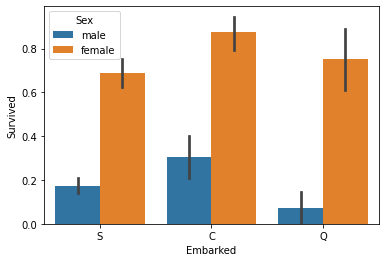

In [ ]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=df_train)

In [ ]:
def ages(df):
  df.Age = df.Age.fillna(-0.5)
  bins = (-1,0,5,12,18,25,35,60,120)
  group_names = ['Desconocido','Bebé','Niño','Adolescente','Estudiante','Joven Adulto','Adulto','Mayor']
  categories = pd.cut(df.Age,bins=bins,labels=group_names)
  df.Age = categories
  return df

def cabins(df):
  df.Cabin = df.Cabin.fillna('N')
  df.Cabin = df.Cabin.apply(lambda x: x[0])
  return df

def fare(df):
  df.Fare = df.Fare.fillna(-0.5)
  bins = (-1,0,8,15,31,1000)
  group_names = ['Desconocido','1 Cuartil','2 Cuartil','3 Cuartil','4 Cuartil',]
  categories = pd.cut(df.Fare,bins=bins,labels=group_names)
  df.Fare = categories
  return df

def name(df):
  df['Last_name'] = df.Name.apply(lambda x: x.split(' ')[0])
  df['Prefix'] = df.Name.apply(lambda x: x.split(' ')[1])
  return df

def drop(df):
  return df.drop(['Name','Ticket','Embarked'],inplace=True,axis=1)

def transform_features(df):
  df = ages(df)
  df = cabins(df)
  df = fare(df)
  df = name(df)
  df = drop(df)
  return df

transform_features(df_train)
transform_features(df_test)

In [ ]:
from sklearn import preprocessing

def encode_features(data_train,data_test):
  features = ['Sex','Age','Fare','Cabin','Last_name','Prefix']
  df_combined = pd.concat([data_train[features],data_test[features]])

  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df_combined[feature])
    df_train[feature] = le.transform(df_train[feature])
    df_test[feature] = le.transform(df_test[feature])
  return df_train, df_test

encode_features(df_train,df_test)

(     PassengerId  Survived  Pclass  Sex  ...  Fare  Cabin  Last_name  Prefix
 0              1         0       3    1  ...     0      7        100      19
 1              2         1       1    0  ...     3      2        182      20
 2              3         1       3    0  ...     0      7        329      16
 3              4         1       1    0  ...     3      2        267      20
 4              5         0       3    1  ...     1      7         15      19
 ..           ...       ...     ...  ...  ...   ...    ...        ...     ...
 886          887         0       2    1  ...     1      7        535      26
 887          888         1       1    0  ...     2      1        294      16
 888          889         0       3    0  ...     2      7        383      16
 889          890         1       1    1  ...     2      2         69      19
 890          891         0       3    1  ...     0      7        214      19
 
 [891 rows x 11 columns],
      PassengerId  Pclass  Sex  Age 

In [ ]:
from sklearn.model_selection import train_test_split

X_all = df_train.drop(['Survived','PassengerId'],axis=1)
y_all = df_train['Survived']

num_test = 0.2
x_train,x_test,y_train,y_test = train_test_split(X_all,y_all,random_state = 23, test_size=num_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


In [ ]:
clf = RandomForestClassifier()

In [ ]:
parameters = {'n_estimators': [4,6,9],
              'max_features': ['log2','sqrt','auto'],
              'criterion': ['entropy','gini'],
              'max_depth': [2,3,5,10],
              'min_samples_split': [2,3,5],
              'min_samples_leaf': [1,5,8]
}

In [ ]:
acc_scorer = make_scorer(accuracy_score)

In [ ]:
grid_obj = GridSearchCV(clf,parameters,acc_scorer)
grid_obj = grid_obj.fit(x_train,y_train)

In [ ]:
clf = grid_obj.best_estimator_

In [ ]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = clf.predict(x_test)
print(accuracy_score(y_test,predictions))

0.8324022346368715
